<a href="https://colab.research.google.com/github/daqichen/CIFAR10/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import plot_model
%matplotlib inline

# Comparing Models

The following code generates plots that compare the cross-entropy losses and prediction accuracies of the five models that were trained.

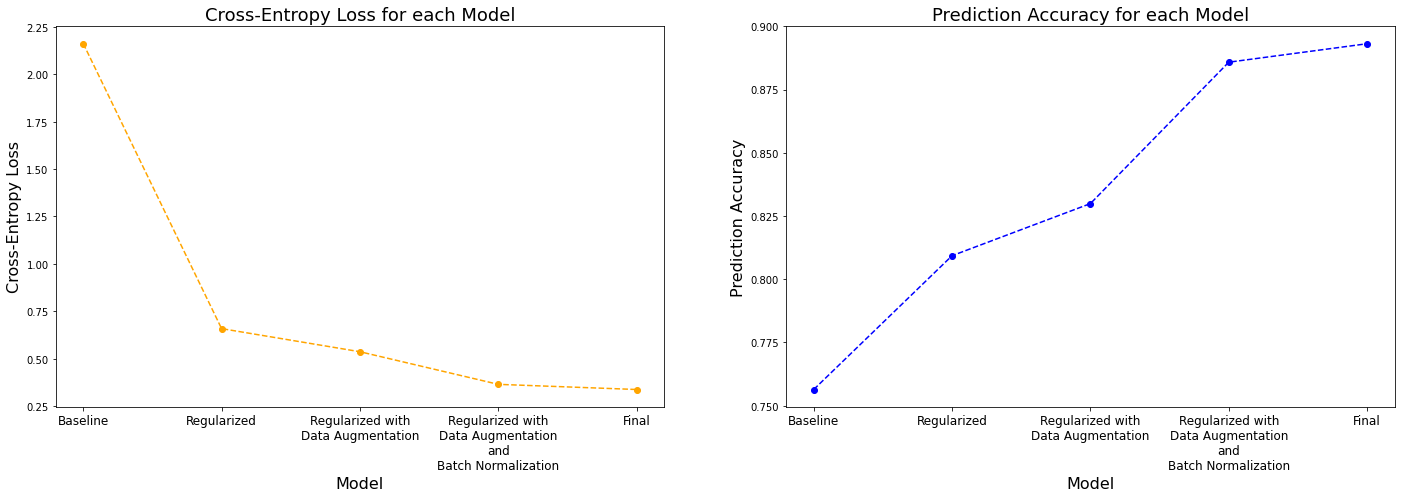

In [ ]:
models = ['Baseline', 'Regularized', 'Regularized with\nData Augmentation', 'Regularized with\nData Augmentation\nand\nBatch Normalization', 'Final']
accuracies = [0.7564, 0.8093, 0.8299, 0.8858, 0.8931]
losses = [2.1614, 0.6589, 0.5371, 0.3652, 0.3380]

plt.figure(figsize=(24,7))

plt.subplot(121)
plt.title('Cross-Entropy Loss for each Model', fontsize=18)
plt.xticks(fontsize=12)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.plot(models, losses, '--o', color='orange')

plt.subplot(122)
plt.title('Prediction Accuracy for each Model', fontsize=18)
plt.xticks(fontsize=12)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)
plt.plot(models, accuracies, '--o', color='blue')
yaxis = plt.gca().axes.yaxis
yaxis.set_ticks([0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9])

# Baseline Model

The following code prints a summary and displays a diagram of the baseline model.

In [ ]:
# define baseline model
def baseline_model():
  # initialize model
  model = Sequential()
  # add layers to model
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# instantiate baseline model
baseline_model = baseline_model()

In [ ]:
# print summary of baseline model
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

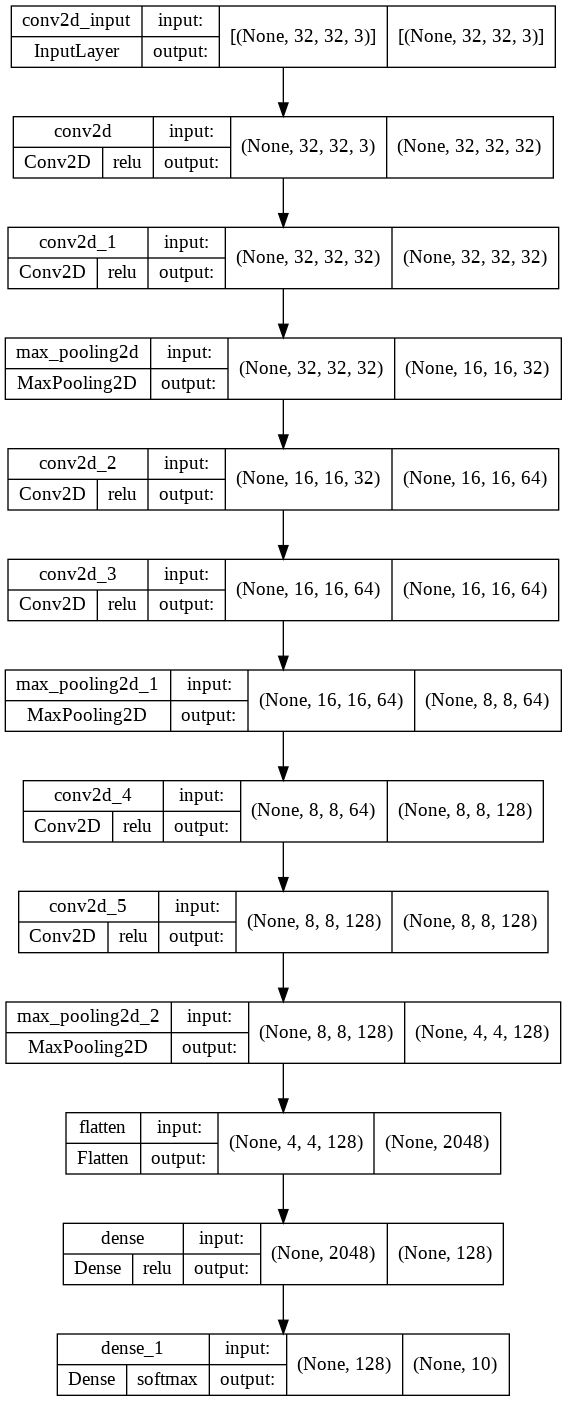

In [ ]:
# display diagram of baseline model
plot_model(baseline_model, show_shapes=True, show_layer_activations=True)

# Regularized Model

The following code prints a summary and displays a diagram of the regularized model.

***Note:*** *The neural network architecture of the regularized model is identical to that of the regularized model with data augmentation. The regularized model with data augmentation simply adds modified images to the training set.*

In [ ]:
# define regularized model
def regularized_model():
  # initialize model
  model = Sequential()
  # add layers to model
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# instantiate regularized model
regularized_model = regularized_model()

In [ ]:
# print summary of regularized model
regularized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

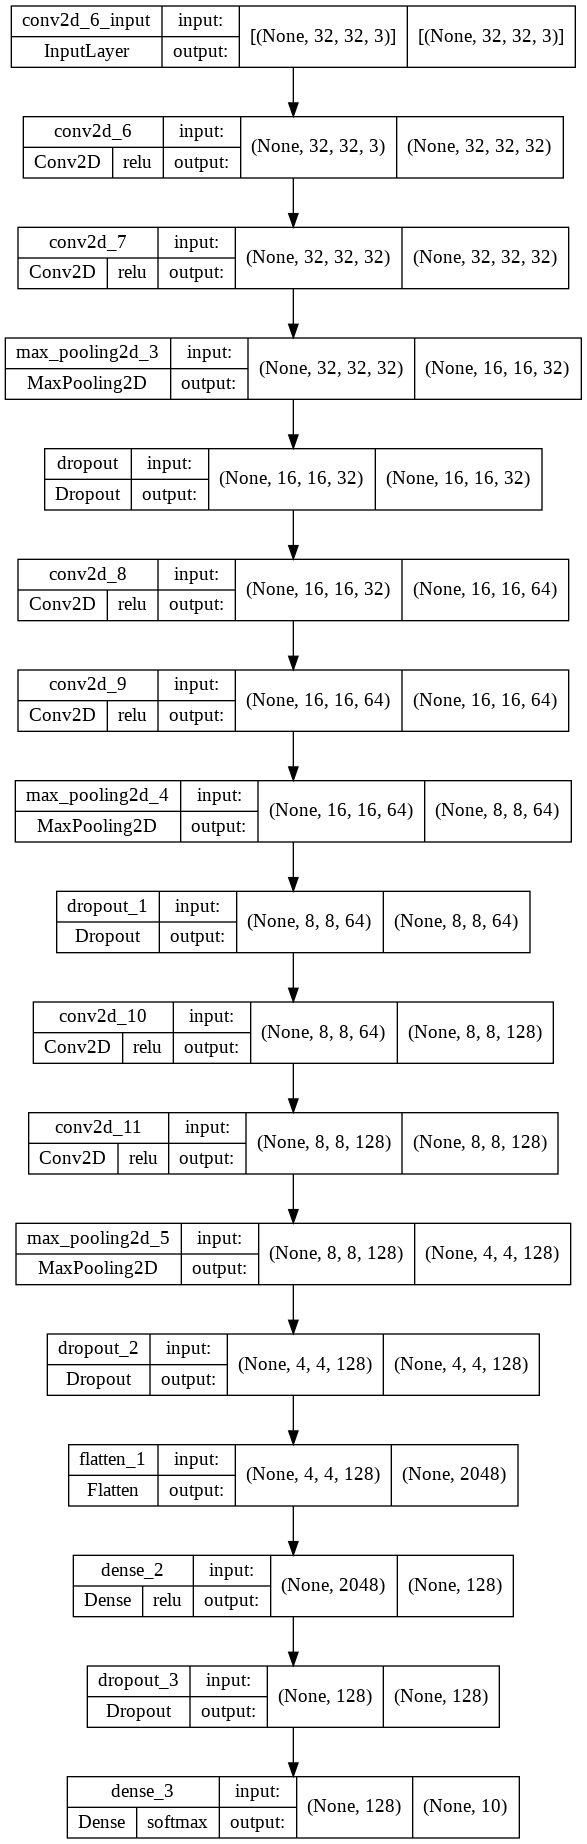

In [ ]:
# display diagram of regularized model
plot_model(regularized_model, show_shapes=True, show_layer_activations=True)

# Regularized Model with Batch Normalization

The following code prints a summary and displays a diagram of the regularized model with batch normalization.

***Note:*** *The neural network architecture of the regularized model with batch normalization is identical to that of the regularized model with data augmentation and batch normalization. The following architecture is also identical to that of the final model.*

In [ ]:
# define regularized model with batch normalization
def regularized_model_batch_norm():
  # initialize model
  model = Sequential()
  # add layers to model
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# instantiate regularized model with batch normalization
regularized_model_batch_norm = regularized_model_batch_norm()

In [ ]:
# print summary of regularized model with batch normalization
regularized_model_batch_norm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

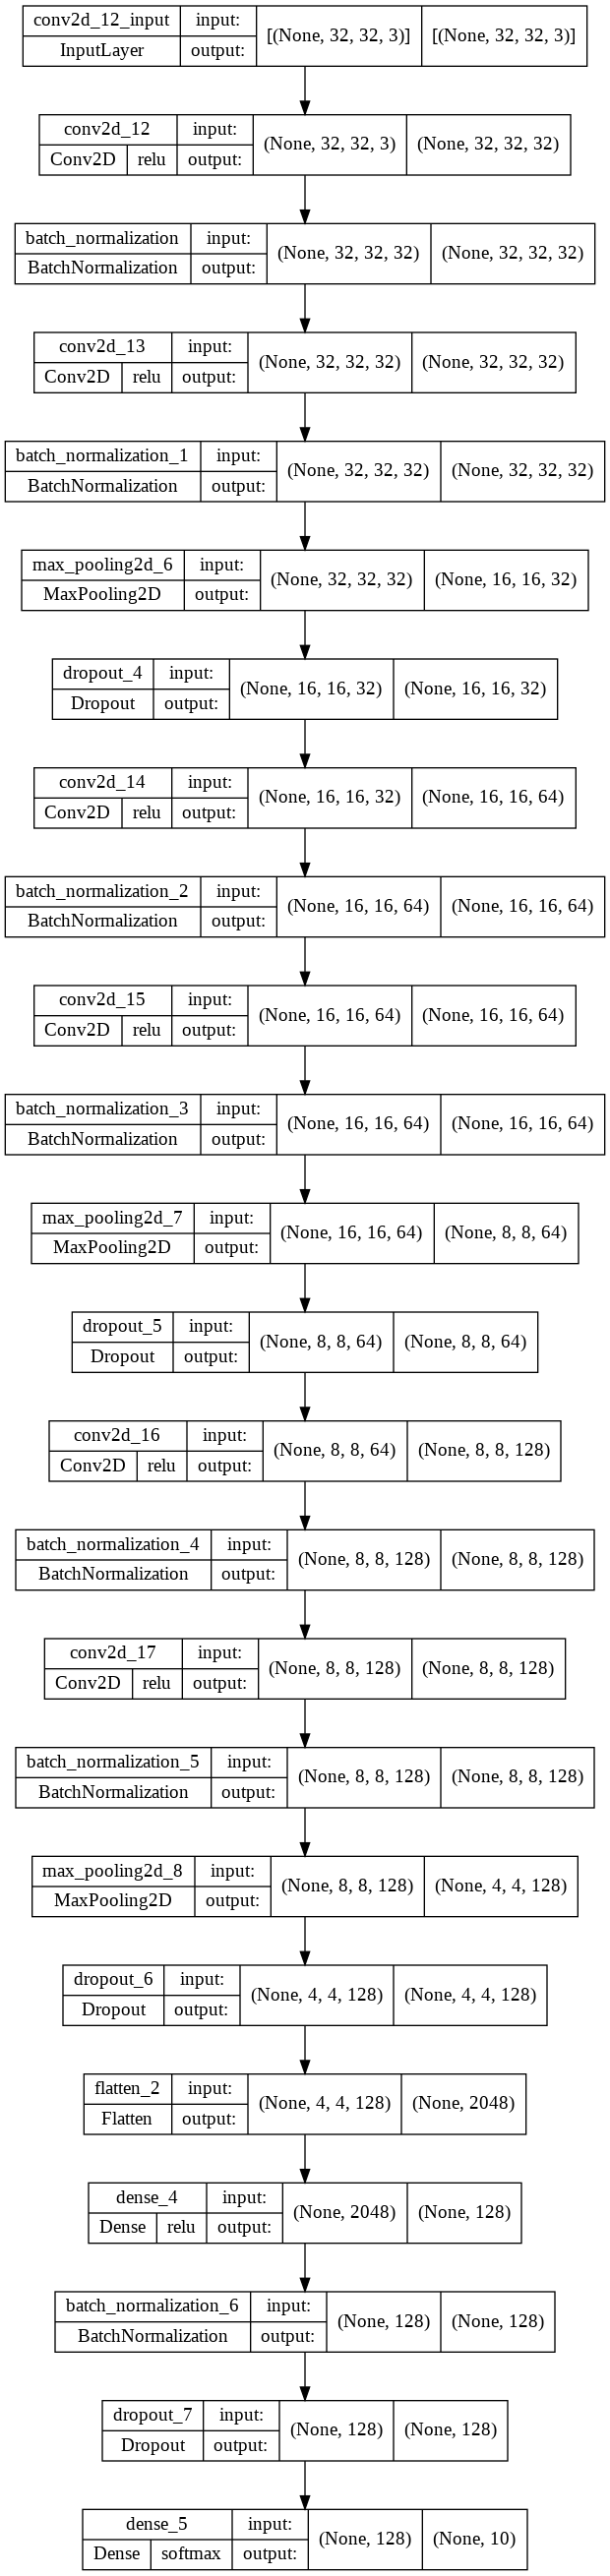

In [ ]:
# display diagram of regularized model with batch normalization
plot_model(regularized_model_batch_norm, show_shapes=True, show_layer_activations=True)